In [118]:
import pandas as pd
import numpy as np
import random  
import matplotlib
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC
from sklearn.metrics import *
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

In [2]:
#To hide FutureWarning & DataConversionWarning from the output
import warnings
from sklearn.exceptions import *
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

## DATA PREPARATION & VISUALIZATION 

In [3]:
class_labels = [
    "T-shirt/top",
    "Trouser",
    "Pullover",
    "Dress",
    "Coat",
    "Sandal",
    "Shirt",
    "Sneaker",
    "Bag",
    "Ankle boot"
]

In [4]:
# importing datasets as pd.dataframes and Removing the first column (Unnamed: 0) from both train and test
train = pd.read_csv("train.csv").drop("Unnamed: 0", axis = 1)
test = pd.read_csv("test.csv").drop("Unnamed: 0", axis = 1)
# Downsizing dataset:
random.seed(1995)
train = train.sample(frac =.1).reset_index(drop = True)
test = test.sample(frac=.1).reset_index(drop= True)
#The shape of data
train.shape,test.shape

((3000, 785), (500, 785))

In [1]:
#View data
# train

### a)  Split your data into X and y:

In [6]:
train_x_a = train.iloc[:,1:]
train_y = train[["label"]]
test_x = test.iloc[:,1:]
test_y = test[["label"]]

### b)  Visualizing the data:

In [7]:
def plot_image(row):
    image_array = np.array(row).reshape(28,28)            # reshaping from 1-d array to 28*28
    plt.axis("off")                                       #Removing axises
    plt.imshow(image_array, interpolation='spline36')

### c) Class visualization:

## Try to print all images in one figure


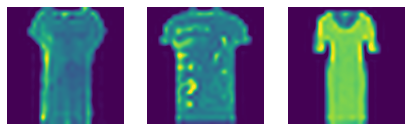

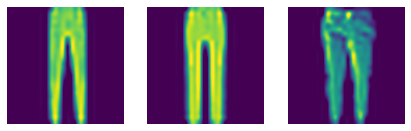

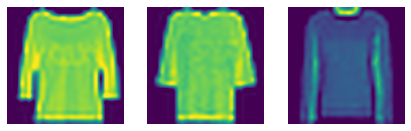

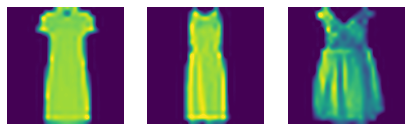

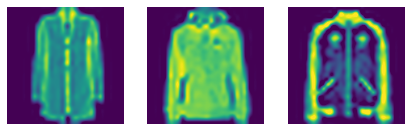

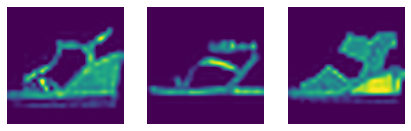

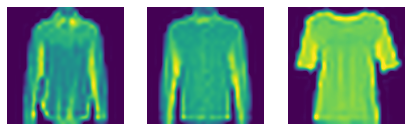

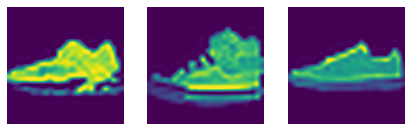

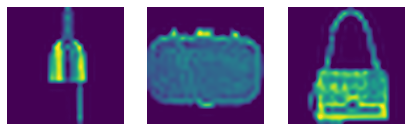

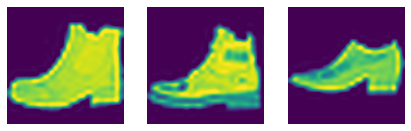

In [8]:
n = 1
for i in range(10):                           # for each value of labels
    fig = plt.figure(figsize = (75,75))       #initiate figure for each calss
    for j in range(3):                        #taking 3 instances of each class
        fig.add_subplot(1,30,n)               #Append figure by each created image
        plot_image(train[train.label == i].iloc[[j],1:])   # printing each instance
        n += 1

### d) Average visualization:

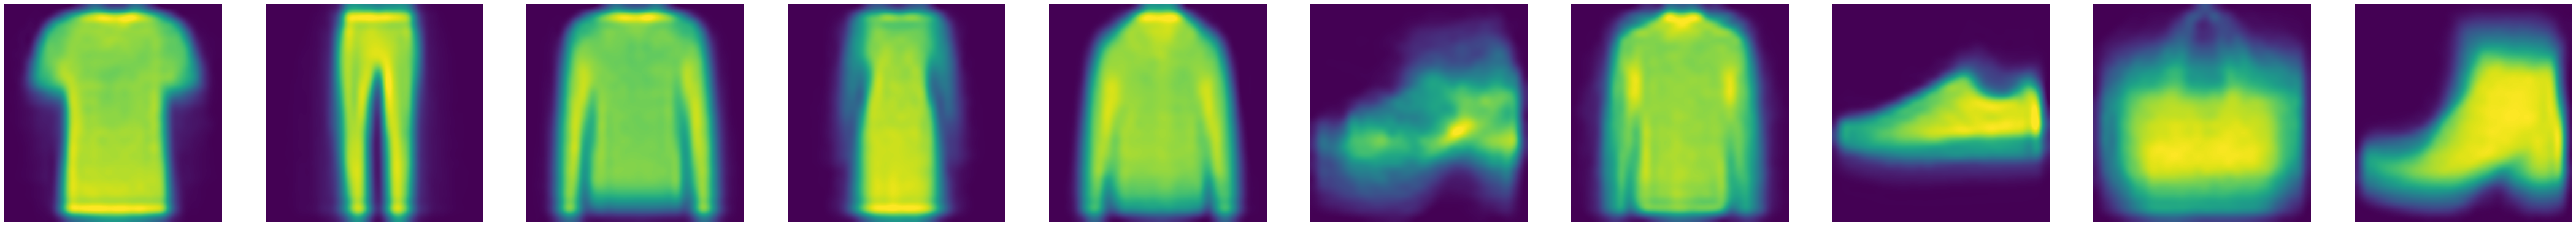

In [9]:
fig2 = plt.figure(figsize = (75,75))
n = 1
for i in range(10):
    image_mean = train.groupby(by = "label").mean().iloc[[i],:]         # Finding the mean image for each class
    fig2.add_subplot(1,10,n)
    plot_image(image_mean)                                             # plotting the mean image 
    n +=1

## BINARY CLASSIFICATION

### e) Binary transformation:

In [10]:
#Binary transforming function
def binary_trans(df):
    df = df.replace([0,1,2,3,4,6],1)      #converting clothing pices
    df = df.replace([5,7,8,9], 0)         #converting non-clothing pices
    return df

In [11]:
train_y_e = binary_trans(train_y)

In [12]:
test_y_f = binary_trans(test_y)

### f) Binary Classification Model

In [13]:
# create model, train it and perofrm 5 fold cross validation.
reg_model = LogisticRegression()
accuracy_scores = cross_val_score(reg_model, train_x_a, train_y_e, scoring = "accuracy", cv = 5)

In [14]:
# print mean accuracy
print(accuracy_scores.mean())

0.9856705231588606


### g) Predict test data:

In [15]:
# Confusion matrix function:
def plot_matrix(actual, pred, labels= []):
    confusion = confusion_matrix(actual, pred, labels) #Creating confusion matrix
    fig = plt.figure()                                 #creating the figure
    window = fig.add_subplot(1,1,1)                    #subfigure for each matrix
    matrix = window.matshow(confusion)                 #Display an array as a matrix in a new figure window
    fig.colorbar(matrix)                               #adding colorbar based of the confusion matrix
    #Adding figure's labels
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title("Confusion Matrix\n")

confusion matrix:
 [[198   6]
 [  4 292]]

 Accuracy:
 0.98

 Precision:
 0.9798657718120806

 Recall:
 0.9864864864864865

 F1_score:
 0.9831649831649831


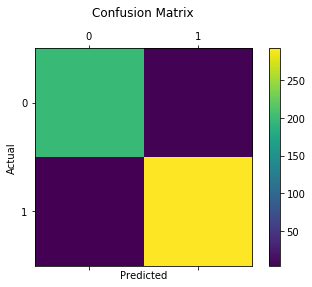

In [16]:
# train the model
reg_model.fit(train_x_a, train_y_e)
# predicting pred_y:
pred_y = reg_model.predict(test_x)

confusion = confusion_matrix(test_y_f, pred_y)
accuracy = accuracy_score(test_y_f, pred_y)
precision = precision_score(test_y_f, pred_y)
recall = recall_score(test_y_f, pred_y)
f1 = f1_score(test_y_f, pred_y)
# plot different metrics scores:
print("confusion matrix:\n {}\n\n Accuracy:\n {}\n\n Precision:\n {}\n\n Recall:\n {}\n\n F1_score:\n {}"
      .format(confusion,accuracy,precision, recall,f1))

#plotting confusion matrix map
plot_matrix(test_y_f, pred_y, labels=[0,1])

### h) Model evaluation:


Text(0.5, 1.0, 'precision-recall curve')

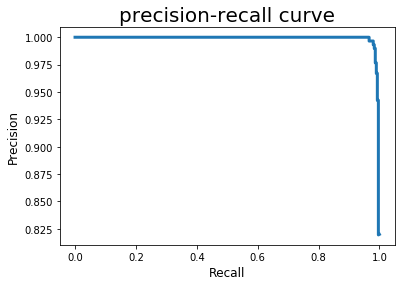

In [17]:
y_scores = reg_model.decision_function(test_x)  #Getting the decision scores of the instances

# Finding different precision and recall scores for different threshold values
precisions, recalls, thresholds = precision_recall_curve(test_y_f, y_scores) 

# plot precision-recall curve
plt.plot(recalls,precisions,linewidth=3.0)
plt.xlabel("Recall", fontsize=12)
plt.ylabel("Precision", fontsize=12)
plt.title("precision-recall curve", fontsize=20)



Area under the curve: 0.9981948860625331


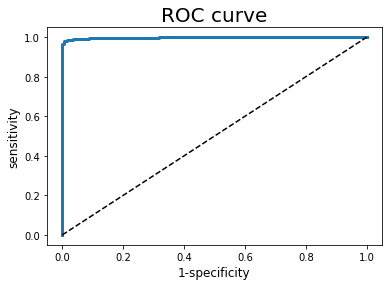

In [18]:
# plot ROC curve
false_p_r, true_p_r, _ = roc_curve(test_y_f, y_scores) # Getting false positive rate and true positive rate
plt.plot(false_p_r,true_p_r,linewidth=3.0)
plt.xlabel("1-specificity", fontsize=12)
plt.ylabel("sensitivity", fontsize=12)
plt.title("ROC curve", fontsize=20)
plt.plot([0, 1], [0, 1], 'k--')      #Adding diagonal line
  
# print AUC score
area_under_the_curve = roc_auc_score(test_y_f, y_scores)
print('Area under the curve: {}'.format(area_under_the_curve))

### i) Learning curves:

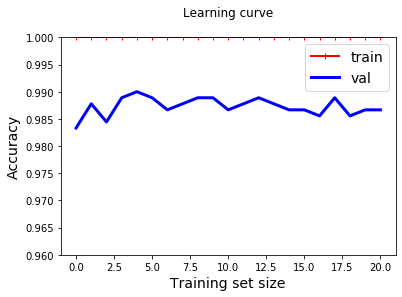

In [117]:
#learning curve function:
def plot_lc(model,features,labels):
    #splitting the data into train and validation sets, rando
    train_x, val_x, train_y, val_y = train_test_split(features, labels, test_size=0.3)    
    train_errors, val_errors = [], []
    sample_size = 100
    while sample_size <= len(train_x):
        model.fit(train_x[:sample_size], train_y[:sample_size])  #Training the model on i instances of training dataset
        train_pred = model.predict(train_x[:sample_size])
        val_pred = model.predict(val_x)
        train_errors.append(accuracy_score(train_pred, train_y[:sample_size]))
        val_errors.append(accuracy_score(val_pred, val_y))
        sample_size += 100                                  # +100 at each step
    plt.plot(train_errors, "r-+", linewidth=2, label="train")
    plt.plot(val_errors, "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)
    plt.xlabel("Training set size", fontsize=14) 
    plt.ylabel("Accuracy", fontsize=14)
    plt.title("Learning curve\n")
    
# plot learning curve reporting accuracy
random.seed(250)
plot_lc(reg_model,train_x_a, train_y_e)
    
    
        
        

    




## MULTICLASS CLASSIFICATION USING LOGISTIC REGRESSION

### j) Training and cross validating logistic regression:

In [44]:
# 3 fold Cross Validation on train_x_a and train_y
multi_reg_model = LogisticRegression()
multi_accuracy_scores = cross_val_score(multi_reg_model, train_x_a, train_y, scoring = "accuracy", cv = 3)

# print mean accuracy
print(multi_accuracy_scores.mean())

0.7586761654853144


### k) testing logistic regression:

In [45]:
# train the model
multi_reg_model.fit(train_x_a, train_y)

# test model
multi_pred_y = multi_reg_model.predict(test_x)
# print confusion matrix
multi_confusion = confusion_matrix(test_y, multi_pred_y)
multi_confusion

array([[37,  0,  0,  3,  0,  0,  6,  0,  1,  0],
       [ 0, 46,  0,  0,  1,  0,  0,  0,  0,  0],
       [ 0,  2, 32,  2,  5,  0,  6,  0,  0,  0],
       [ 2,  1,  1, 39,  1,  0,  4,  0,  0,  0],
       [ 0,  3,  7,  5, 23,  0, 13,  0,  1,  0],
       [ 1,  0,  0,  1,  0, 36,  4,  3,  1,  5],
       [ 7,  0,  8,  6,  6,  0, 28,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  2,  1, 47,  0,  2],
       [ 0,  0,  2,  1,  2,  1,  4,  1, 39,  0],
       [ 0,  0,  2,  0,  0,  1,  0,  2,  0, 46]], dtype=int64)

(None,)

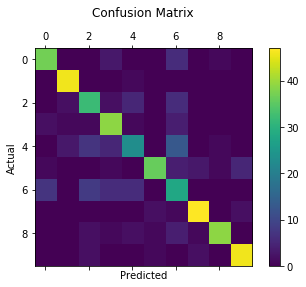

In [46]:
#plottong confusion matrix map
plot_matrix(test_y, multi_pred_y, labels = [0,1,2,3,4,5,6,7,8,9]),

## MULTICLASS CLASSIFICATION USING SVR

### l) Grid search to find best model:

In [85]:
#SVM model:
svm_model = SVC()

#Hyperparameter possible combinations:
hyperparameter_candidates = [{"C":[0.1, 0.5, 1, 5, 10], "tol":[0.0001, 0.001, 0.1],"decision_function_shape":["ovo","ovr"],
                              "kernel":["linear","rbf","poly"]}] # correcting the fist value of tol to 0.0001

# Building SVM model with best parameters using grid search
SVM_grid = GridSearchCV(svm_model ,hyperparameter_candidates, cv=5, scoring='accuracy')
SVM_grid.fit(train_x_a, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='auto_deprecated', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='warn', n_jobs=None,
             param_grid=[{'C': [0.1, 0.5, 1, 5, 10],
                          'decision_function_shape': ['ovo', 'ovr'],
                          'kernel': ['linear', 'rbf', 'poly'],
                          'tol': [0.0001, 0.001, 0.1]}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='accuracy', verbose=0)

In [92]:
# Best model's parameters and mean accuracy
print("Best model's parameter: {}\nBest model mean accuracy: {}".format(SVM_grid.best_params_,SVM_grid.best_score_))

Best model's parameter: {'C': 0.1, 'decision_function_shape': 'ovo', 'kernel': 'poly', 'tol': 0.0001}
Best model mean accuracy: 0.8086666666666666


### m)Testing the best model:

confusion matrix:
 [[38  0  0  0  0  0  8  0  1  0]
 [ 0 46  0  0  0  0  1  0  0  0]
 [ 0  0 29  1  9  0  8  0  0  0]
 [ 4  3  0 39  2  0  0  0  0  0]
 [ 0  1  8  3 35  0  5  0  0  0]
 [ 0  0  0  0  0 48  0  1  0  2]
 [ 7  0  5  1  3  0 38  0  1  0]
 [ 0  0  0  0  0  4  0 45  0  3]
 [ 0  0  1  0  0  1  0  0 48  0]
 [ 0  0  0  0  0  0  0  1  0 50]]

 Accuracy:
 0.832


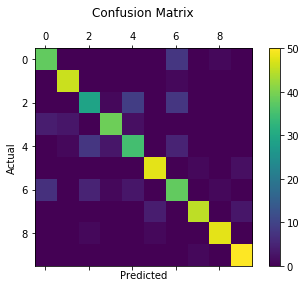

In [99]:
#Best SVM model:
best_svm = SVC(C=0.1, decision_function_shape="ovo", kernel="poly", tol=0.0001)

#training the model:
best_svm.fit(train_x_a, train_y)

#Predicting on test data:
svm_pred = best_svm.predict(test_x)


svm_accuracy = accuracy_score(test_y, svm_pred)  #Testing accuracy
svm_confusion = confusion_matrix(test_y, svm_pred) # confusion matrix
print("confusion matrix:\n {}\n\n Accuracy:\n {}".format(svm_confusion,svm_accuracy))

#Confusion matrix heat map:
plot_matrix(test_y, svm_pred, labels =[0,1,2,3,4,5,6,7,8,9])

## MULTICLASS CLASSIFICATION USING DECISION TREES

### n) Grid Search to find best model:

In [119]:
#Decision tree model:
tree_model = DecisionTreeClassifier() 

#Hyperparameter possible combinations:
tree_candidates = [{"max_depth":[2, 4, 10], "min_samples_split":[2, 3, 4]}]

# Building decision tree model with best parameters using grid search
tree_grid = GridSearchCV(tree_model ,tree_candidates, cv=5, scoring='accuracy')
tree_grid.fit(train_x_a, train_y)

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid=[{'max_depth': [2, 4, 10],
                          'min_samples_split': [2, 3, 4]}],
             pre_dispatch

In [120]:
# Best model's parameters and mean accuracy
print("Best model's parameter: {}\nBest model mean accuracy: {}".format(tree_grid.best_params_,tree_grid.best_score_))

Best model's parameter: {'max_depth': 10, 'min_samples_split': 3}
Best model mean accuracy: 0.7326666666666667


### o) Testing the best model:

confusion matrix:
 [[29  0  1  5  0  0 11  0  1  0]
 [ 1 42  0  4  0  0  0  0  0  0]
 [ 0  0 23  3 13  0  8  0  0  0]
 [ 2  3  0 39  1  0  3  0  0  0]
 [ 0  0  7  4 35  1  4  0  1  0]
 [ 0  0  0  1  0 44  0  3  0  3]
 [13  0  7  3  8  1 22  0  1  0]
 [ 0  0  0  0  0  3  0 41  2  6]
 [ 2  0  0  0  1  2  1  2 40  2]
 [ 0  0  0  1  0  3  0  1  0 46]]

 Accuracy:
 0.722


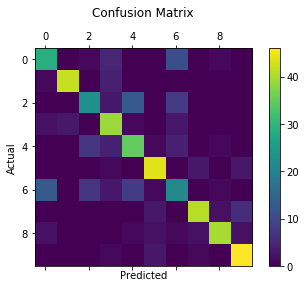

In [123]:
# Best Decision tree model:
best_tree = DecisionTreeClassifier(max_depth=10, min_samples_split=3)

#training the model:
best_tree.fit(train_x_a, train_y)

#Predicting on test data:
tree_pred = best_tree.predict(test_x)

tree_accuracy = accuracy_score(test_y, tree_pred)              #Testing accuracy
tree_confusion = confusion_matrix(test_y, tree_pred)           # confusion matrix
print("confusion matrix:\n {}\n\n Accuracy:\n {}".format(tree_confusion,tree_accuracy))

#Confusion matrix heat map:
plot_matrix(test_y, tree_pred, labels =[0,1,2,3,4,5,6,7,8,9])